# PART 3.1 - Hyperparameter Comparison and Selection

En esta parte vamos a comparar el comportamiento de la red neuronal ante distintas configuraciones.

In [1]:
from NeuralNet import NeuralNet
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
def read_data(file_path):
    data = []
    with open(file_path, mode='r', encoding='utf-8-sig') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        for row in csv_reader:
            data.append([float(value) for value in row])
    return np.array(data)

In [3]:
def mean_squared_error(y_pred, y_true):
    total_error = 0
    for predicted, real in zip(y_pred, y_true):
        total_error += (real - predicted) ** 2
    mean_error = total_error / len(y_true)
    return mean_error


def mean_absolute_error(y_pred, y_true):
    total_error = 0
    for predicted, real in zip(y_pred, y_true):
        total_error += abs(real - predicted)
    mean_error = total_error / len(y_true)
    return mean_error

def mean_absolute_percentage_error(y_pred, y_true):
    total_error = 0
    for predicted, real in zip(y_pred, y_true):
        total_error += abs((real - predicted) / real)
    mean_error = total_error / len(y_true)
    return (mean_error * 100)


In [4]:
def scatter_plot(y_pred, y_true):
    """Scatter plot of the predictions vs true values."""
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred, label='Predictions')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Predictions')
    plt.title('Predictions vs True Values')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.legend()
    plt.grid()
    plt.show()


def loss_errors(train_errors, val_errors):
    """Plot the evolution of training and validation errors."""
    epochs = np.arange(1, len(train_errors) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_errors, label="Training Error", marker='o')
    plt.plot(epochs, val_errors, label="Validation Error", marker='o')
    plt.title("Training and Validation Errors")
    plt.xlabel("Epochs")
    plt.ylabel("Quadratic Error")
    plt.legend()
    plt.grid()
    plt.show()

In [5]:
hyperparameters = [
        {
            "layers": [14, 128, 64, 32, 1],
            "epochs": 185,
            "learning_rate": 0.015,
            "momentum": 0.75,
            "activation": "tanh"
        },
        {
            "layers": [14, 128, 64, 32, 1],
            "epochs": 100,
            "learning_rate": 0.015,
            "momentum": 0.75,
            "activation": "tanh"
        },
        {
            "layers": [14, 128, 64, 32, 1],
            "epochs": 100,
            "learning_rate": 0.015,
            "momentum": 0.75,
            "activation": "sigmoid"
        },
        {
            "layers": [14, 128, 64, 32, 1],
            "epochs": 100,
            "learning_rate": 0.015,
            "momentum": 0.75,
            "activation": "relu"
        }, 
        {
            "layers": [14, 128, 64, 32, 1],
            "epochs": 100,
            "learning_rate": 0.015,
            "momentum": 0.75,
            "activation": "linear"
        }
]

In [6]:
X_train = read_data('./data/X_train.csv')
y_train = read_data('./data/y_train.csv')

X_test = read_data('./data/X_test.csv')
y_test = read_data('./data/y_test.csv')

Configuration-> {'layers': [14, 128, 64, 32, 1], 'epochs': 185, 'learning_rate': 0.015, 'momentum': 0.75, 'activation': 'tanh'}
Mean Squared Error: [0.00100534]
Mean Absolute Error: [0.02261814]
Mean Absolute Percentage Error: [4.73751973]


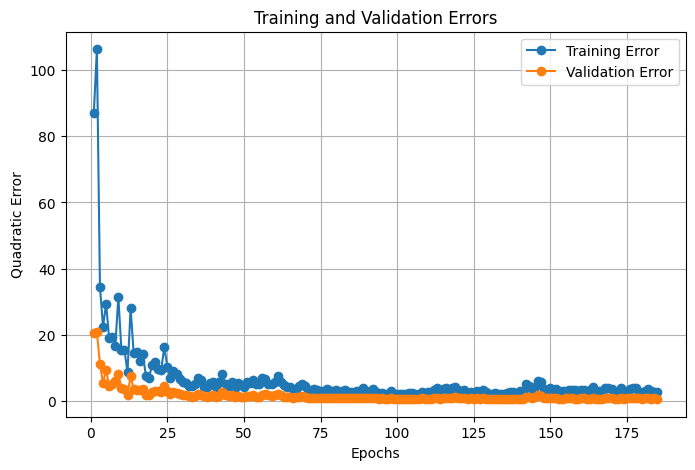

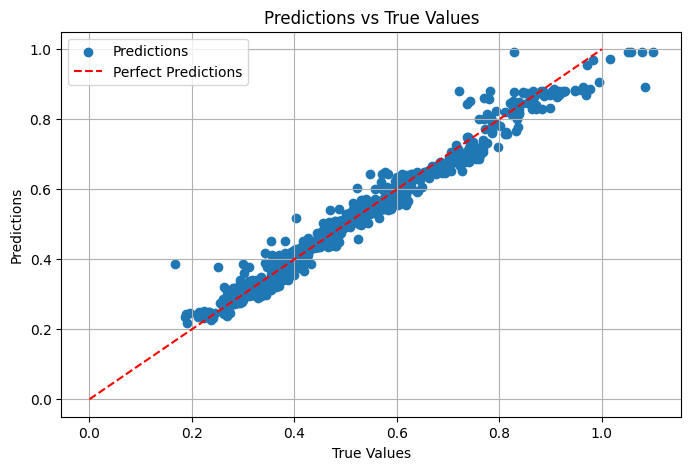

Configuration-> {'layers': [14, 128, 64, 32, 1], 'epochs': 100, 'learning_rate': 0.015, 'momentum': 0.75, 'activation': 'tanh'}
Mean Squared Error: [0.00130977]
Mean Absolute Error: [0.02546054]
Mean Absolute Percentage Error: [5.28483378]


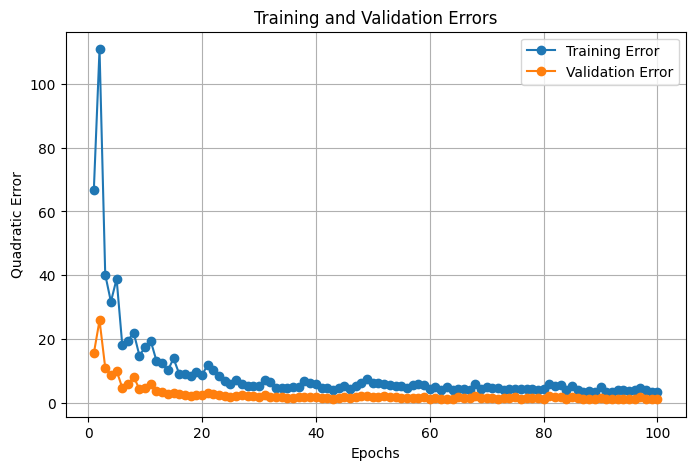

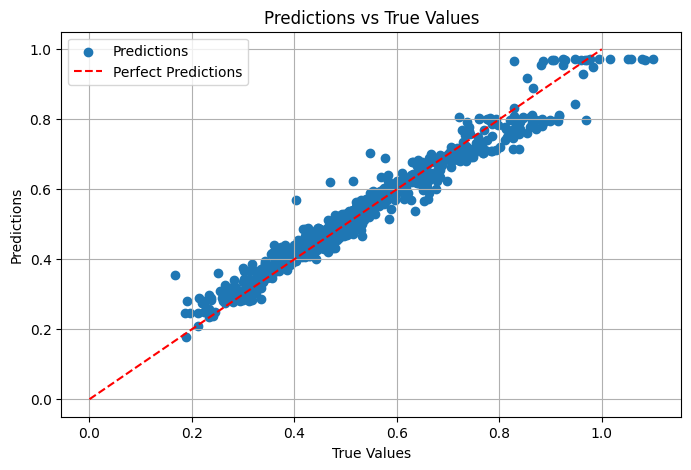

Configuration-> {'layers': [14, 128, 64, 32, 1], 'epochs': 100, 'learning_rate': 0.015, 'momentum': 0.75, 'activation': 'sigmoid'}
Mean Squared Error: [0.00263146]
Mean Absolute Error: [0.0349522]
Mean Absolute Percentage Error: [7.05826096]


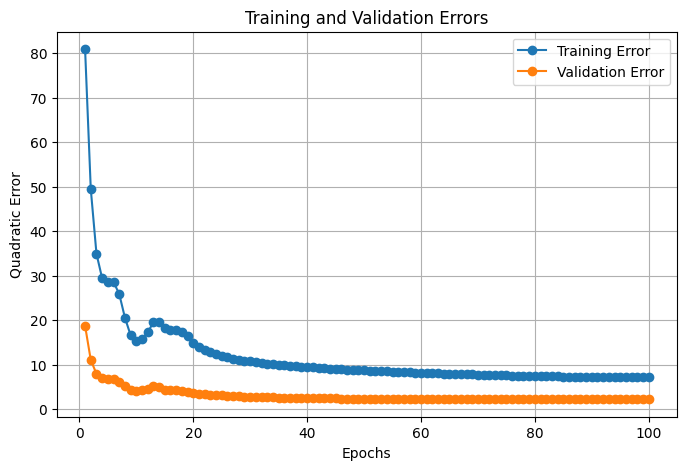

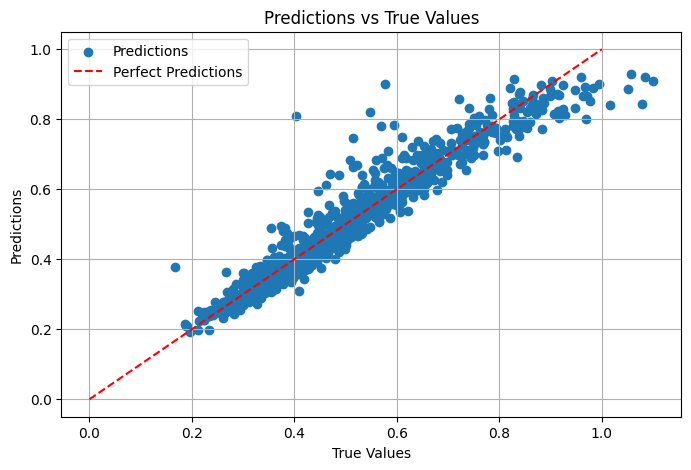

Configuration-> {'layers': [14, 128, 64, 32, 1], 'epochs': 100, 'learning_rate': 0.015, 'momentum': 0.75, 'activation': 'relu'}
Mean Squared Error: [0.29363552]
Mean Absolute Error: [0.51277117]
Mean Absolute Percentage Error: [100.]


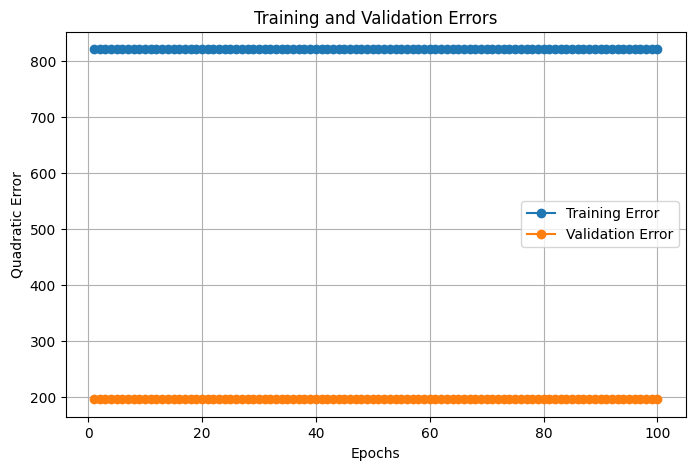

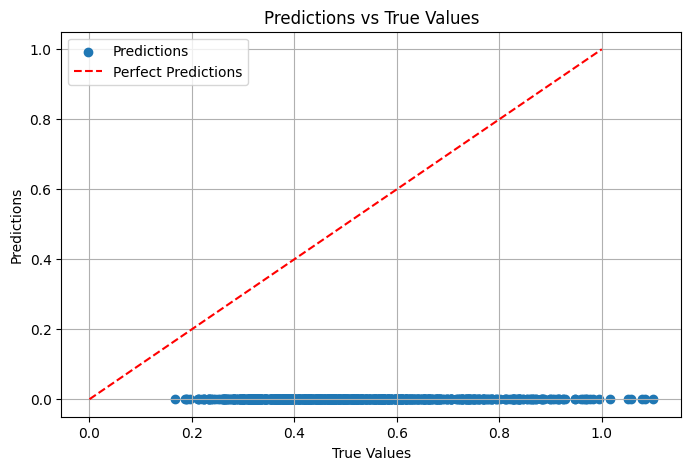

Configuration-> {'layers': [14, 128, 64, 32, 1], 'epochs': 100, 'learning_rate': 0.015, 'momentum': 0.75, 'activation': 'linear'}
Mean Squared Error: [nan]
Mean Absolute Error: [nan]
Mean Absolute Percentage Error: [nan]


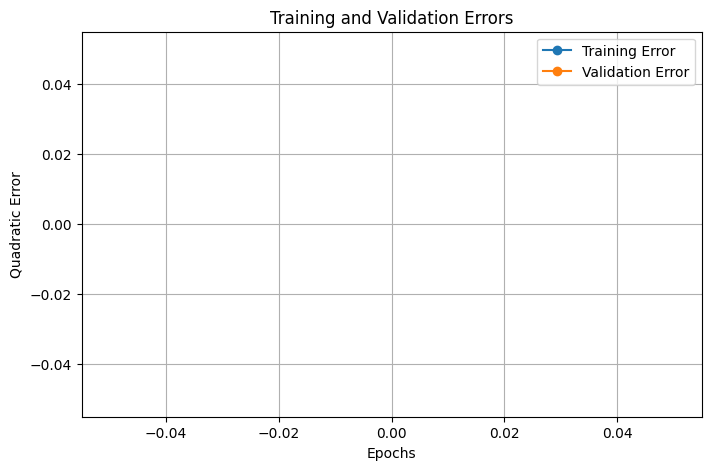

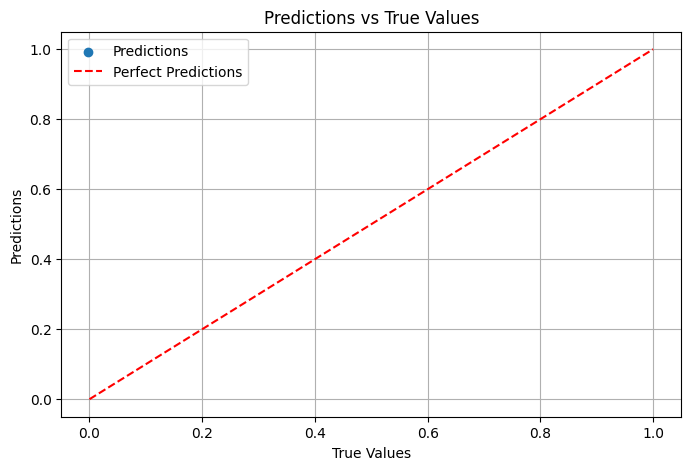

In [7]:
for configuration in hyperparameters:
    nn = NeuralNet(layers=configuration['layers'], epochs=configuration['epochs'],
                    learning_rate=configuration['learning_rate'], momentum=configuration['momentum'],
                    fact=configuration['activation'], val_split=0.2)

    nn.fit(X_train, y_train)

    train_loss, val_loss = nn.loss_epochs()

    predictions = nn.predict(X_test)

    mse = mean_squared_error(predictions, y_test)
    mae = mean_absolute_error(predictions, y_test)
    mape = mean_absolute_percentage_error(predictions, y_test)

    print("============================================================")
    print(f'Configuration-> {configuration}')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Absolute Percentage Error: {mape}')
    print("============================================================")

    loss_errors(train_loss, val_loss)
    scatter_plot(predictions, y_test)
